In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [6]:
print("Start data reading")
x_train = pd.read_csv("X_train.csv", header=None)
x_test = pd.read_csv("X_test.csv", header=None)
y_train = pd.read_csv("y_train.csv", header=None)
y_test = pd.read_csv("y_test.csv", header=None)
print("Finish data reading")

Start data reading
Finish data reading


In [47]:
clf = MLPClassifier(500)

print("Start model fitting")
clf.fit(x_train, y_train)
print("Finish model fitting")

Start model fitting


/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finish model fitting


In [48]:
pred = clf.predict(x_test)

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

In [50]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.92      0.98      0.95       496
          2       0.96      0.91      0.93       471
          3       0.97      0.95      0.96       420
          4       0.85      0.96      0.90       491
          5       0.96      0.85      0.90       532
          6       1.00      1.00      1.00       537

avg / total       0.94      0.94      0.94      2947



In [51]:
print(precision_score(y_test, pred, average=None))

[ 0.917  0.955  0.968  0.854  0.96   0.998]


In [52]:
print("accuracy : {}".format(accuracy_score(y_test, pred)))
print("f1_score : {}".format(f1_score(y_test, pred, average=None)))

accuracy : 0.9399389209365456
f1_score : [ 0.949  0.931  0.957  0.902  0.9    0.999]


Normalized confusion matrix
[[ 0.984  0.002  0.014  0.     0.     0.   ]
 [ 0.079  0.909  0.013  0.     0.     0.   ]
 [ 0.014  0.04   0.945  0.     0.     0.   ]
 [ 0.     0.004  0.     0.955  0.039  0.002]
 [ 0.002  0.     0.     0.15   0.848  0.   ]
 [ 0.     0.     0.     0.     0.     1.   ]]


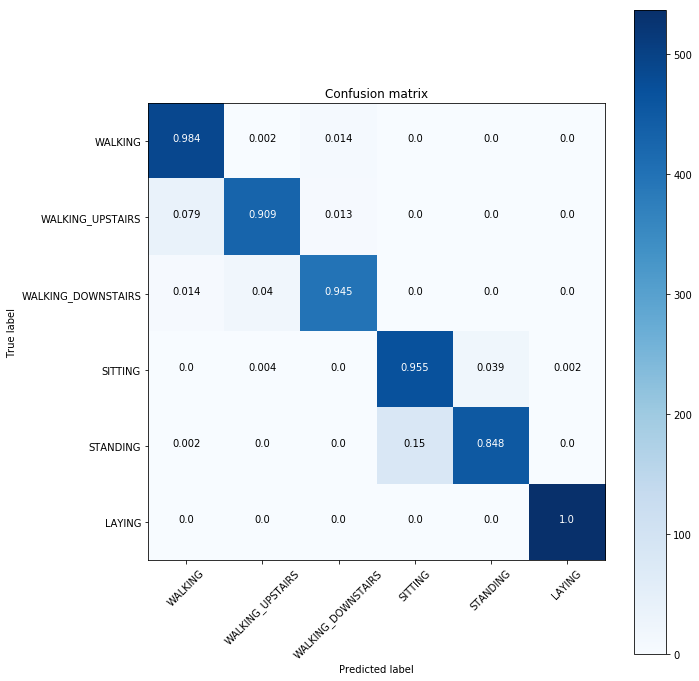

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=3)

plt.figure(figsize=(10, 10))

class_names = ["WALKING", 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix', normalize=True)
plt.show()